PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  


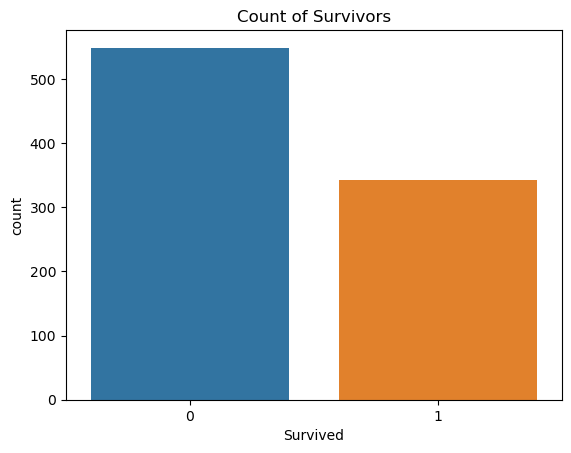

C:\Users\tejas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


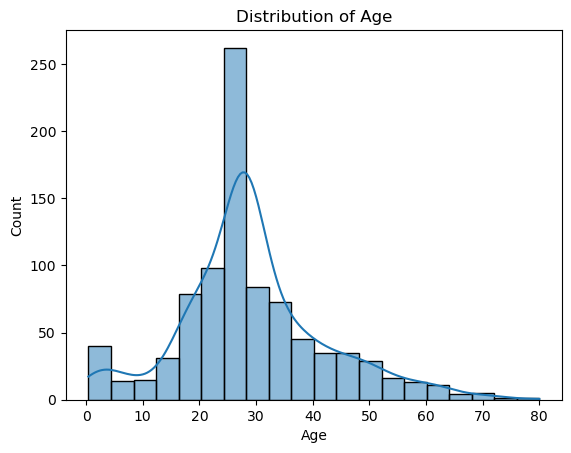

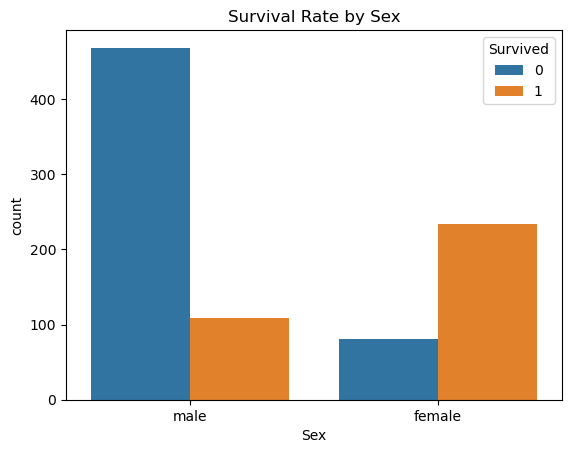

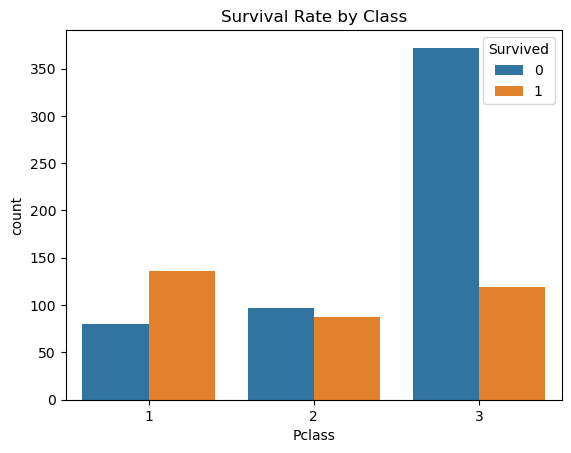

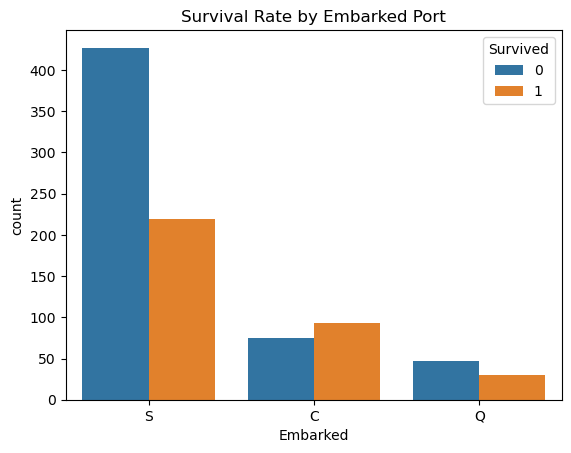

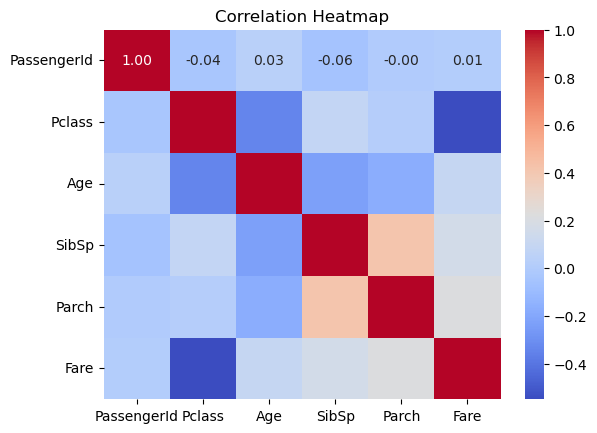

In [13]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
gender_submission_df = pd.read_csv('titanic/gender_submission.csv')

# Step 3: Data Cleaning
# For this example, let's focus on the training dataset train_df.

# Check for missing values
print(train_df.isnull().sum())

# Handle missing values
# For 'Age', fill missing values with median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# For 'Embarked', fill missing values with the most common value
most_common_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(most_common_embarked, inplace=True)

# Drop 'Cabin' column as it has too many missing values
train_df.drop('Cabin', axis=1, inplace=True)

# Step 4: Exploratory Data Analysis (EDA)

# Descriptive Statistics
print(train_df.describe())

# Univariate Analysis
# Count of survivors
sns.countplot(x='Survived', data=train_df)
plt.title('Count of Survivors')
plt.show()

# Distribution of Age
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

# Bivariate Analysis
# Convert 'Survived' column to string if it's not already
train_df['Survived'] = train_df['Survived'].astype(str)

# Survival rate by sex
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by class
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Rate by Class')
plt.show()

# Survival rate by embarked port
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Survival Rate by Embarked Port')
plt.show()

# Visualizations
# Correlation Heatmap
# Exclude non-numeric columns from correlation matrix
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
corr = train_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
